In [21]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft,ifft

In [22]:
df = pd.read_excel(r'C:\Users\zhou.tianhong\Desktop\拧紧数据相关0708\0708\NG_RrStabilizer_1.xlsx')

In [23]:
x = df.loc[:, '角度 (度)']
y = df.loc[:, '扭矩 (N·m)']

# 原数据与降噪

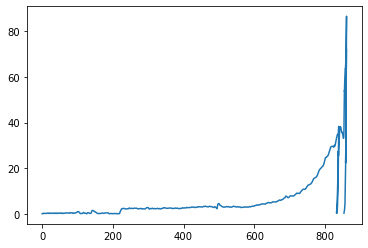

In [24]:
plt.plot(x, y)

In [25]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

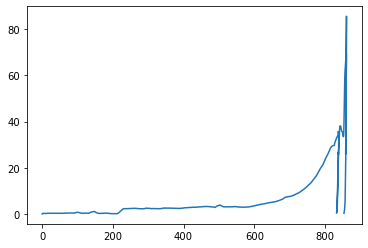

In [26]:
plt.plot(x, smooth(y, 5))

# 归一化与降噪

In [9]:
max_abs_scaler = preprocessing.MaxAbsScaler()
x_hat = max_abs_scaler.fit_transform(x.values.reshape(-1,1))

In [10]:
max_abs_scaler = preprocessing.MaxAbsScaler()
y_hat = max_abs_scaler.fit_transform(y.values.reshape(-1,1))

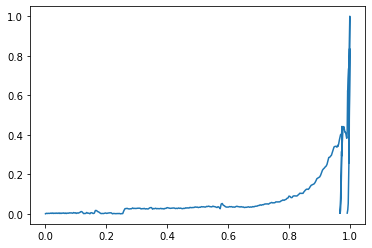

In [11]:
plt.plot(x_hat, y_hat)

In [12]:
from itertools import chain
y_hat = list(chain.from_iterable(y_hat))

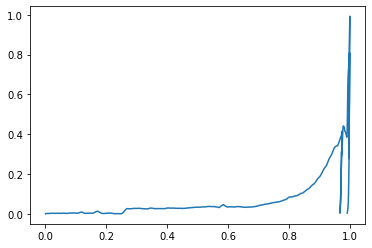

In [13]:
plt.plot(x_hat, smooth(y_hat, 4))

# 标准化与降噪

In [14]:
x_z = preprocessing.scale(x)
y_z = preprocessing.scale(y)

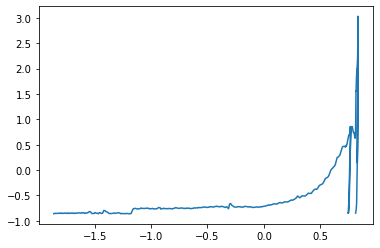

In [15]:
plt.plot(x_z, y_z)

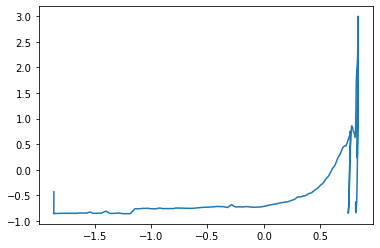

In [16]:
plt.plot(x_z, smooth(y_z, 4))